In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
from sklearn.ensemble import RandomForestRegressor


In [9]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
df.drop(['Car_Name', 'Owner'], axis=1, inplace=True)
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Selling_type   301 non-null    object 
 6   Transmission   301 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 16.6+ KB


In [15]:
df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
dtype: int64

In [20]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980
std,2.891554,5.082812,8.642584,38886.883882
min,2003.000000,0.100000,0.320000,500.000000
25%,2012.000000,0.900000,1.200000,15000.000000
50%,2014.000000,3.600000,6.400000,32000.000000
75%,2016.000000,6.000000,9.900000,48767.000000
max,2018.000000,35.000000,92.600000,500000.000000


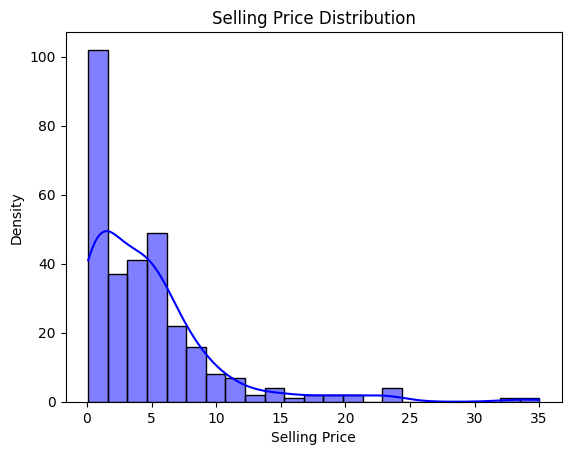

In [22]:
sns.histplot(df['Selling_Price'], kde=True, color='blue')
plt.title('Selling Price Distribution')
plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.show()

In [ ]:

le = LabelEncoder()

df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])


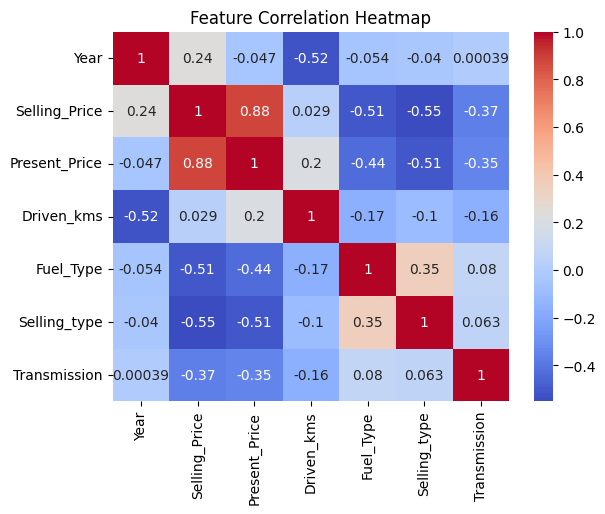

In [29]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [30]:
df.to_csv('car_data_cleaned.csv', index=False)

In [ ]:

df1 = pd.read_csv('car_data_cleaned.csv')
X = df1.drop('Selling_Price', axis=1)
y = df1['Selling_Price']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [36]:
# Predict
y_pred = model.predict(X_test)

In [ ]:

# Evaluate model
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.9628374678714131
MAE: 0.5971114754098364
MSE: 0.8560606498360659
RMSE: 0.9252354564304515


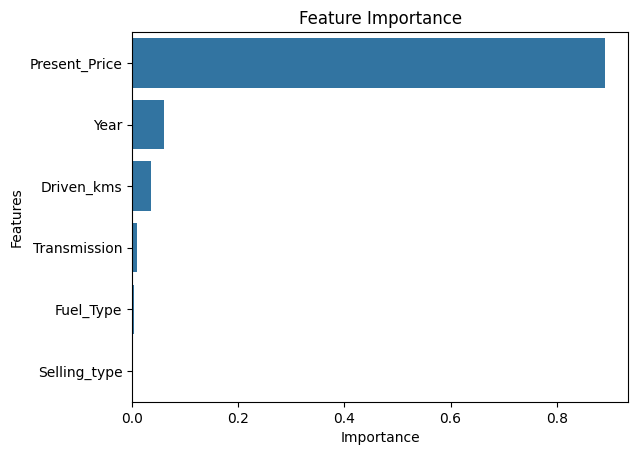

In [37]:
importances = model.feature_importances_
feature_names = X.columns

feature_df = pd.DataFrame({'Features': feature_names, 'Importance': importances})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Features', data=feature_df)
plt.title('Feature Importance')
plt.show()


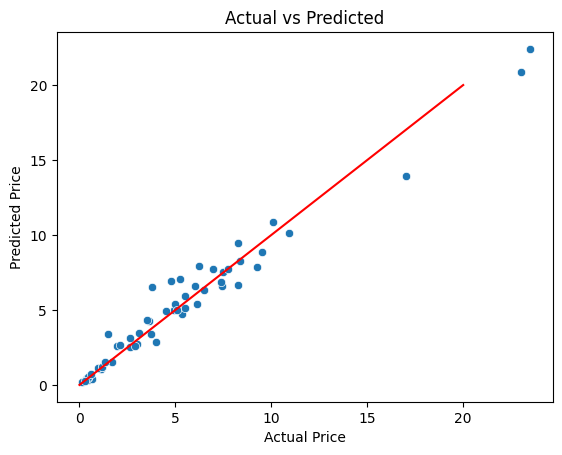

In [ ]:


sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.plot([0, 20], [0, 20], 'r')  
plt.show()


In [ ]:


scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=5)
print("Average MAE (5 folds):", np.mean(-scores))


Average MAE (5 folds): 0.8407309672131149


In [ ]:


param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print(grid.best_params_)


{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
# Final the model

final_model = RandomForestRegressor(
    max_depth=10,
    min_samples_split=2,
    n_estimators=500,
    random_state=42
)

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)


In [ ]:


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R² Score:", r2)


MAE: 0.6132202424379263
R² Score: 0.9627796214923909


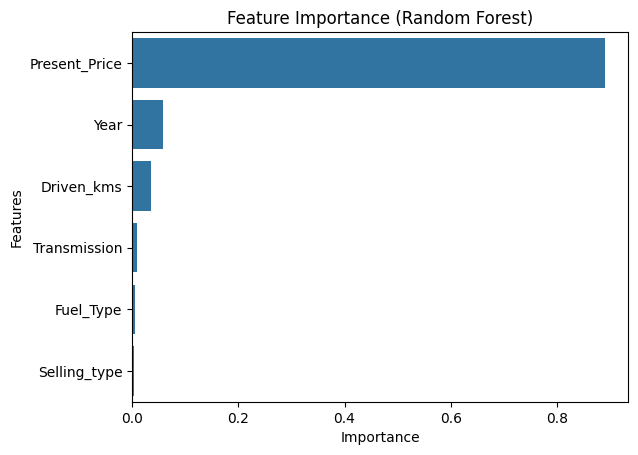

In [45]:


importances = final_model.feature_importances_
feature_names = X.columns

feature_df = pd.DataFrame({'Features': feature_names, 'Importance': importances})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Features', data=feature_df)
plt.title('Feature Importance (Random Forest)')
plt.show()


In [ ]:


# Save
joblib.dump(final_model, 'car_price_model.pkl')

# Load (when needed)
# model = joblib.load('car_price_model.pkl')


['car_price_model.pkl']

In [47]:
model_columns = X.columns
joblib.dump(model_columns, 'model_columns.pkl')


['model_columns.pkl']